In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [26]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
X=df.iloc[:,1:30]
y=df.iloc[:,30]

In [65]:
print("input range: ",X.shape)
print("output range: ",y.shape)

input range:  (284807, 29)
output range:  (284807,)


In [66]:
print("Class labels: \n",y)

Class labels: 
 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [67]:
df.isnull().values.any()

False

Text(0, 0.5, 'number of occurences')

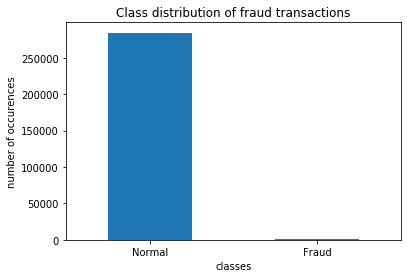

In [68]:
LABELS=["Normal","Fraud"]
set_class=pd.value_counts(df['Class'],sort=True)
set_class.plot(kind='bar',rot=0)
plt.title("Class distribution of fraud transactions")
plt.xticks(range(2), LABELS)
plt.xlabel("classes")
plt.ylabel("number of occurences")

In [69]:
fraud_data=df[df['Class']==1]
normal_data=df[df['Class']==0]
print(fraud_data.shape,normal_data.shape)

(492, 31) (284315, 31)


In [70]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [71]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

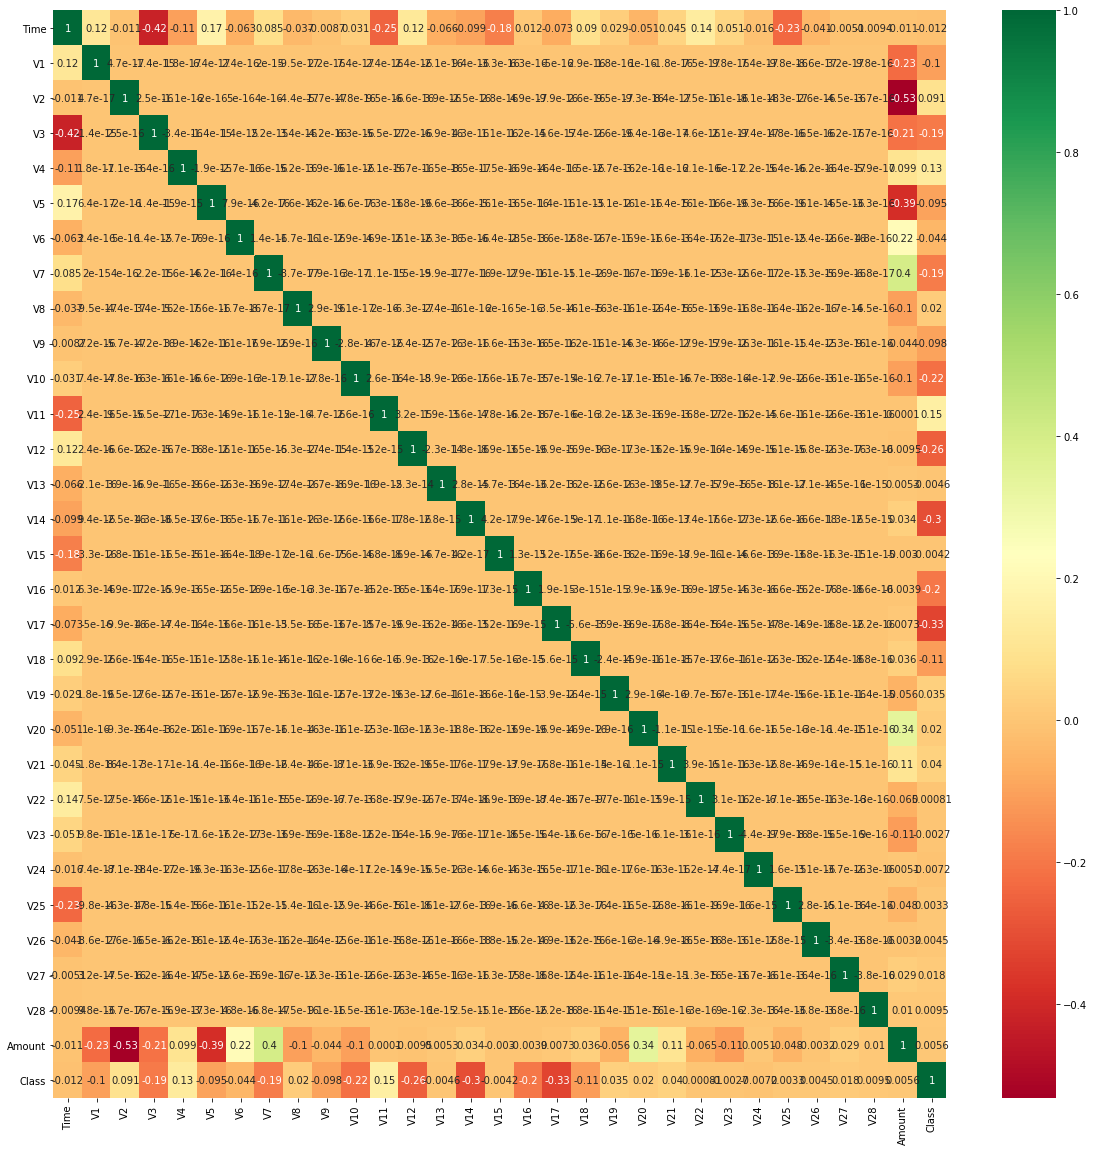

In [88]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [89]:
print("Xtrain : ",X_train.shape)
print("ytrain : ",y_train.shape)
print("Xtest  : ",X_test.shape)
print("ytest  : ",y_test.shape)

Xtrain :  (213605, 29)
ytrain :  (213605,)
Xtest  :  (71202, 29)
ytest  :  (71202,)


In [75]:
from sklearn.preprocessing import StandardScaler
stdsc= StandardScaler()
X_train=stdsc.fit_transform(X_train)
X_test=stdsc.transform(X_test)

In [76]:
print("Training set after standardising : \n",X_train[0])

Training set after standardising : 
 [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [78]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
rfc_predict = rfc.predict(X_test)

In [80]:
print("rfc_prediction is : \n",rfc_predict)

rfc_prediction is : 
 [0 0 0 ... 0 0 0]


Confusion matrix is : 
 [[71075     7]
 [   27    93]]


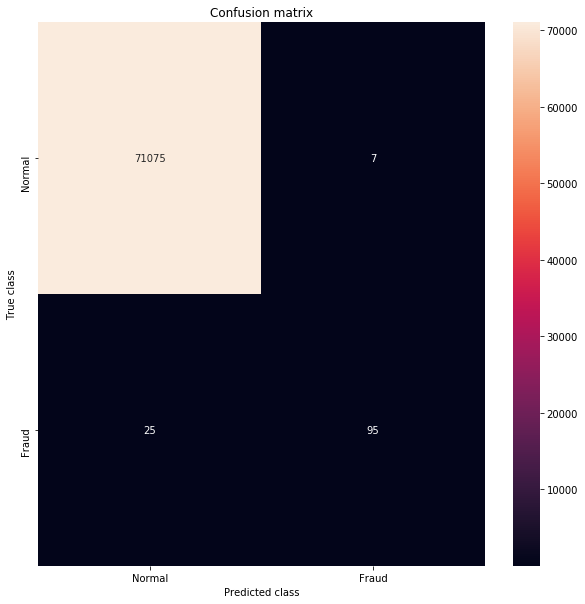

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score 
conf=confusion_matrix(y_test,rfc_predict)
print("Confusion matrix is : \n",decision)
plt.figure(figsize=(10, 10))
sns.heatmap(conf, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [82]:
Accuracy=((decision[0][0]+decision[1][1])/decision.sum())*100
print("Accuracy    :",Accuracy)
Error_rate=((decision[0][1]+decision[1][0])/decision.sum())*100
print("Error rate  :",Error_rate)
Specificity=((decision[1][1])/(decision[1][1]+decision[0][1]))*100
print("Specificity :",Specificity)
Sensitivity=((decision[0][0])/(decision[0][0]+decision[1][0]))*100
print("Sensitivity :",Sensitivity)
prec= precision_score(y_test,rfc_predict)
print("Precision   : {}".format(prec))
rec= recall_score(y_test,rfc_predict)
print("Recall      : {}".format(rec))
f1= f1_score(y_test,rfc_predict)
print("f1 score    : {}".format(f1))

Accuracy    : 99.9522485323446
Error rate  : 0.04775146765540294
Specificity : 93.0
Sensitivity : 99.96202638463053
Precision   : 0.9313725490196079
Recall      : 0.7916666666666666
f1 score    : 0.8558558558558558


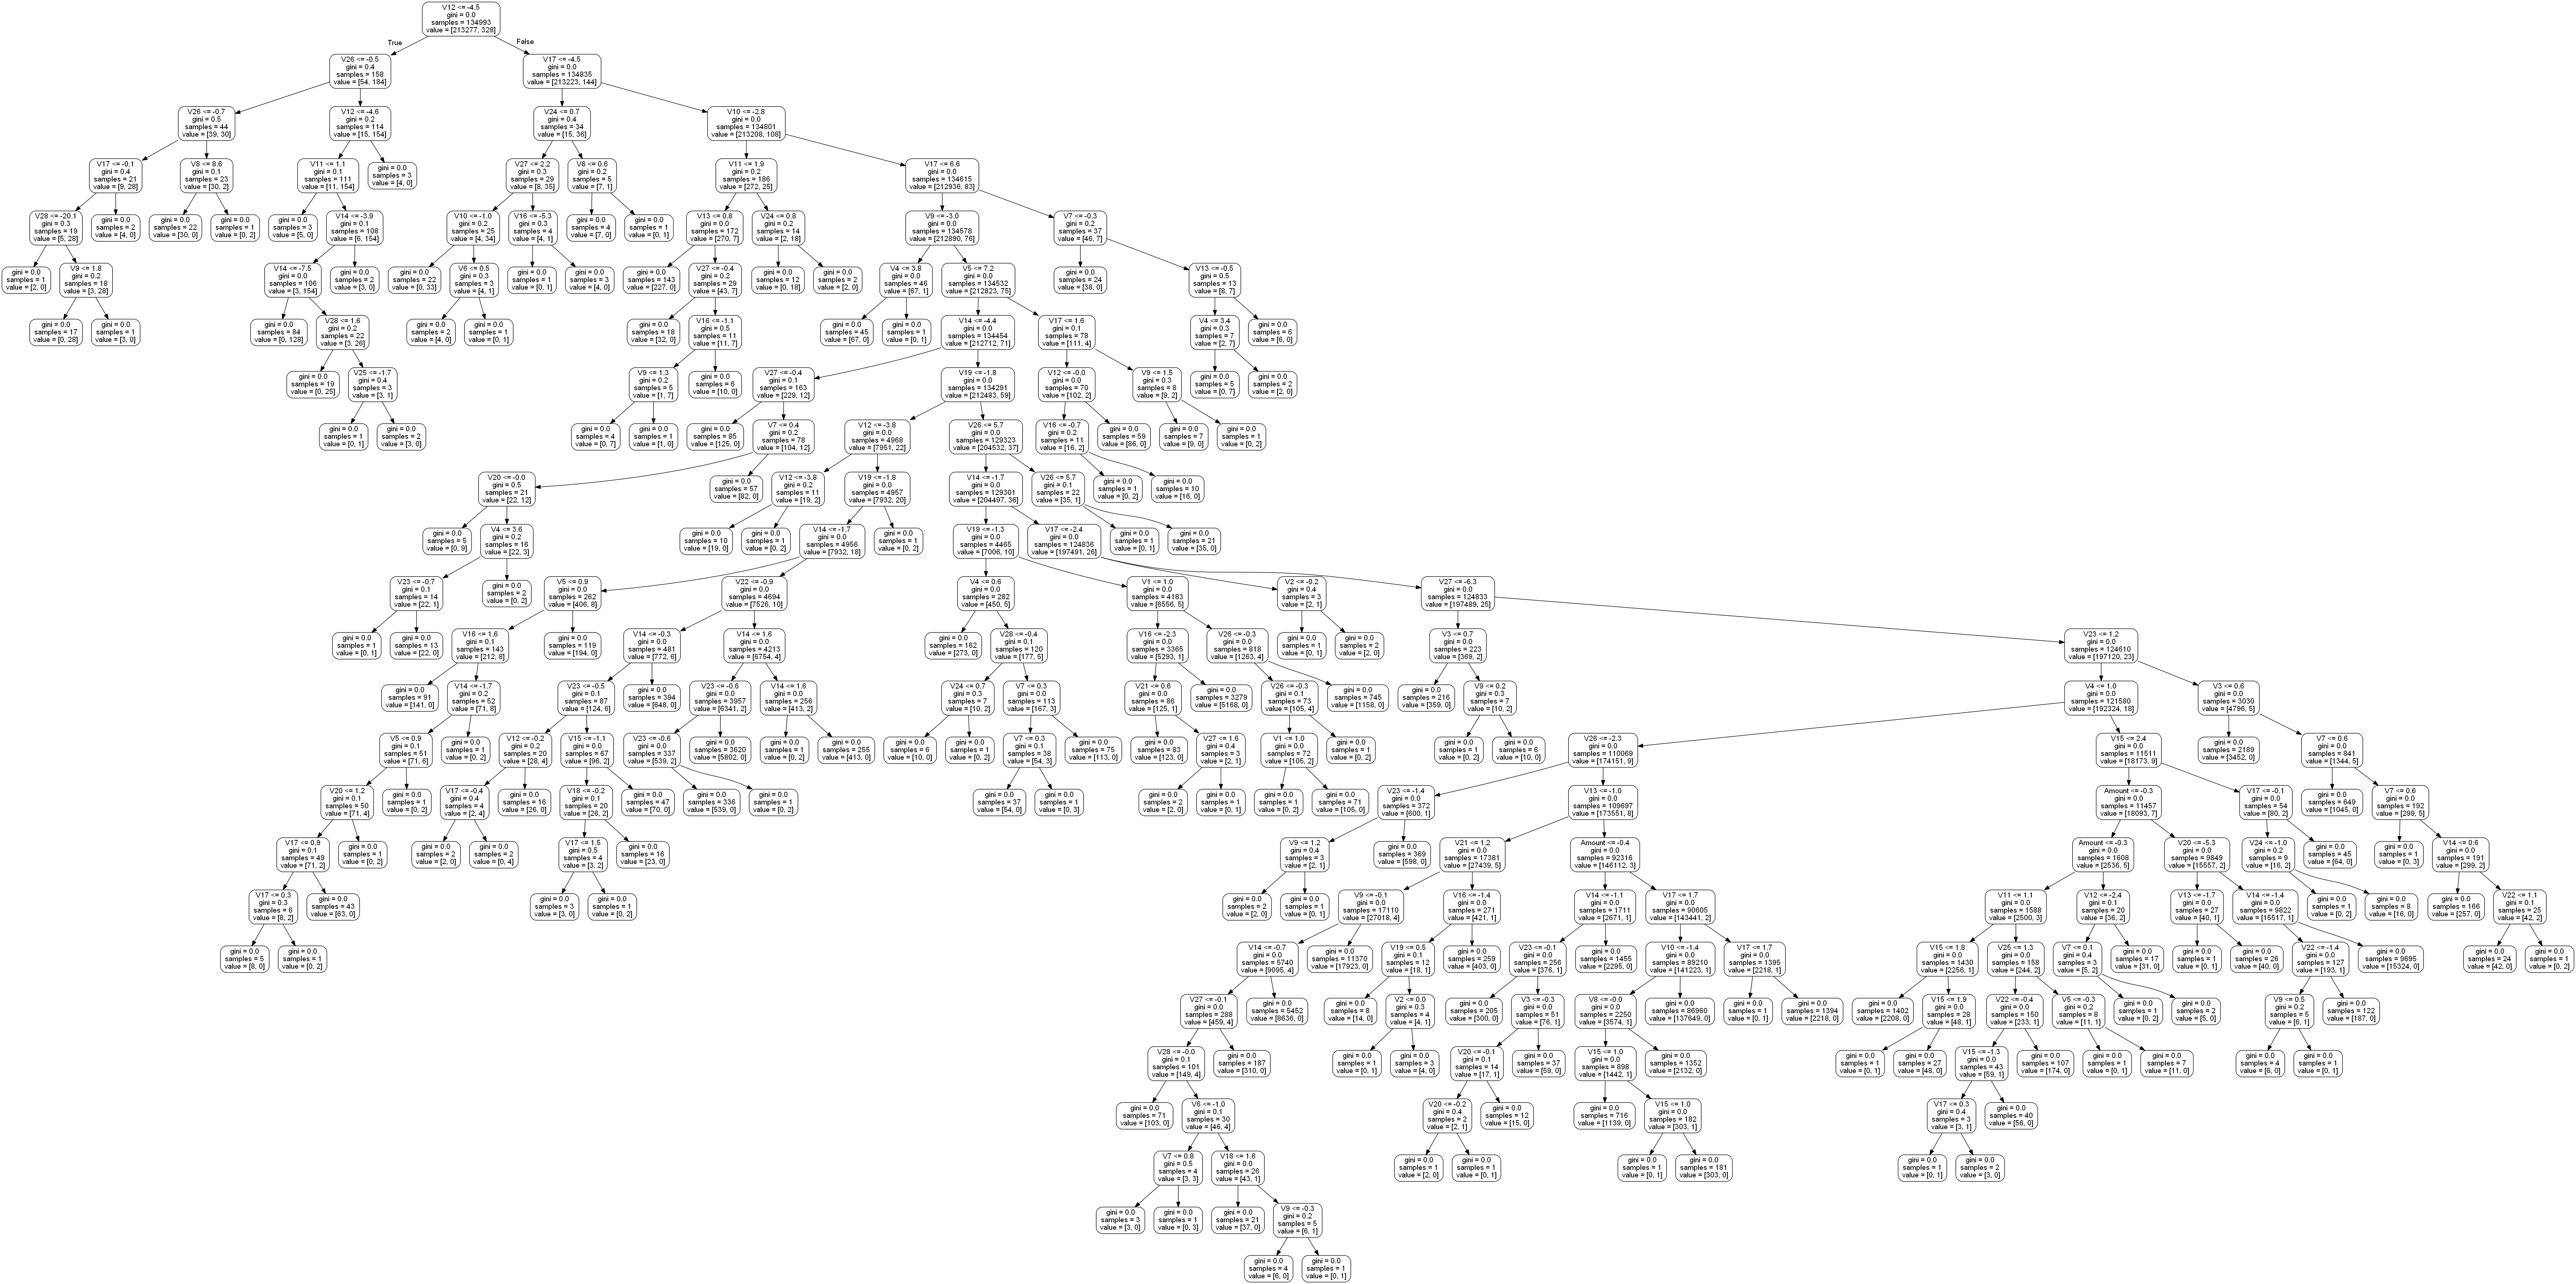

In [86]:
feature_list = list(X.columns)
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
display(Image(graph.create_png()))